In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time



n = 1000
time = 0.006935596466064453


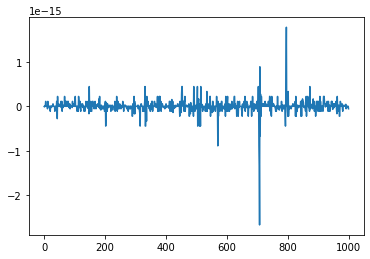

n = 2000
time = 0.01299142837524414


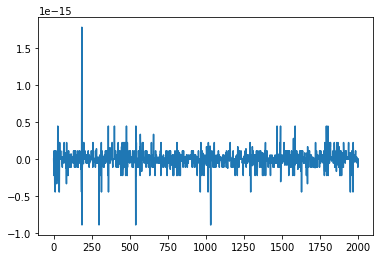

n = 3000
time = 0.019411325454711914


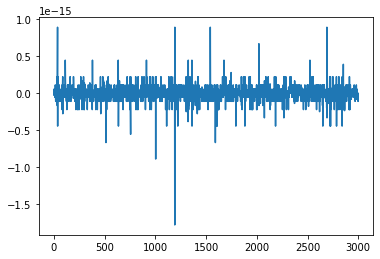

n = 4000
time = 0.028230905532836914


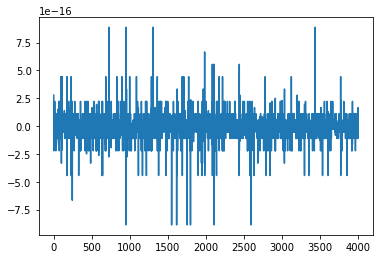

n = 5000
time = 0.0360713005065918


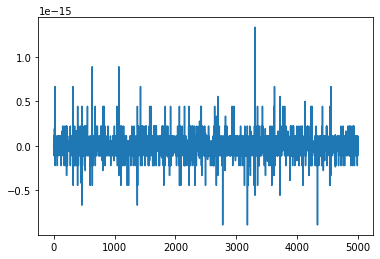

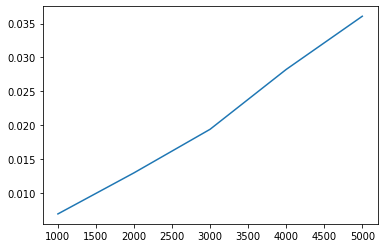

In [3]:
def solve(a, b, c, f, n):
    alpha = np.zeros(n + 1)
    beta = np.zeros(n + 1)
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i + 1] = -c[i] / d
        beta[i + 1] = (f[i] - a[i] * beta[i]) / d
    x = np.zeros(n)
    x[n - 1] = beta[n]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x

qTime = 0.0
n = 0
nList = []
qTimeList = []
while qTime <= 0.03:
    n += 1000
    nList.append(n)
    A = np.zeros((n,n)) 
    a = np.random.uniform(-n, n, n)
    b = np.random.uniform(-n, n, n)
    c = np.random.uniform(-n, n, n)
    f = np.random.uniform(-n, n, n)
    a[0], c[n - 1] = 0, 0
    for i in range(n):
        A[i][i] = abs(b[i])
        if i > 0:
            A[i][i - 1] = a[i]
            A[i][i] = A[i][i] + abs(a[i])
        if i < n - 1:
            A[i][i + 1] = c[i]
            A[i][i] = A[i][i] + abs(c[i])
        b[i] = A[i][i]
    y1 = np.linalg.solve(A, f)
    startTime = time.time()
    y2 = solve(a, b, c, f, n)
    qTime = time.time() - startTime
    qTimeList.append(qTime)
    print(f"n = {n}")
    print(f"time = {qTime}")
    fig, ax = plt.subplots()
    ax.plot(y2-y1)
    plt.show()
    if n % 40 == 0:
        fig.savefig(f"Sweep_graphics/{n:3d}x{n:3d}_{qTime:0.3f}sec.png")
fig, ax = plt.subplots()
ax.plot(nList, qTimeList)
plt.show()
fig.savefig("Sweep_time_dependes_of_quantity.png")
